In [3]:
# 基础数据分析库
import numpy as np
import pandas as pd
# 分词库
import jieba
import re
# 绘图库
import matplotlib.pyplot as plt
from pyecharts.charts import *
from pyecharts import options as opts
from pyecharts.charts import Liquid
from pyecharts.globals import ThemeType
import stylecloud
from IPython.display import Image

In [5]:
df = pd.read_csv('messigowhere.csv', names=['评论内容'])
df.head(3)
df.info()
df['评论内容'] = df['评论内容'].astype('str')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9237 entries, 1 to 9237
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   评论内容    9237 non-null   object
dtypes: object(1)
memory usage: 144.3+ KB


In [6]:
result = []
for i in df['评论内容']:
    result.append(re.split('[:：,，.。!！~·`\;；……、]',i))
    

def club_comment(df,result):
    clubs = pd.DataFrame(np.zeros(7 * len(df)).reshape(len(df),7),
                      columns = ['C罗','苏亚雷斯','瓜迪奥拉','内马尔','阿圭罗','巴托梅乌','科曼'])
    for i in range(len(result)):
        words = result[i]
        for word in words:
            if '梅西' in word or '苏牙' in word:
                clubs.iloc[i + 1]['苏亚雷斯'] = 1
            if 'C罗' in word or 'C' in word or 'c' in word or '梅罗' in word:
                clubs.iloc[i + 1]['C罗'] = 1
            if '苏亚雷斯' in word or '苏牙' in word:
                clubs.iloc[i + 1]['苏亚雷斯'] = 1
            if '迪奥拉' in word or '瓜帅' in word or '瓜秃' in word:
                clubs.iloc[i + 1]['瓜迪奥拉'] = 1
            if '内马尔' in word or '马尔' in word:
                clubs.iloc[i + 1]['内马尔'] = 1
            if '阿圭罗' in word or '阿坤' in word:
                clubs.iloc[i + 1]['阿圭罗'] = 1
            if '巴托' in word or '大熊' in word:
                clubs.iloc[i + 1]['巴托梅乌'] = 1
            if '科曼' in word:
                clubs.iloc[i + 1]['科曼'] = 1
    final_result = pd.concat([df,clubs],axis = 1)
    return final_result

In [7]:
df1 = club_comment(df,result)
df1 = df1.drop(labels = 0)
df1.head(5)

,评论内容,C罗,苏亚雷斯,瓜迪奥拉,内马尔,阿圭罗,巴托梅乌,科曼
1,回老家带动一下经济发展其实也可以的,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,曼城或切尔西吧，毕竟梅西穿上这两队球赛比较好看,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,双人图漂亮,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,为什么阿森纳是漫画,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,曼城，巴黎，国米。至于阿森纳和皇马就别来搞笑了。,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df3 = df1.iloc[:,1:].sum().reset_index().sort_values(0, ascending = True)

df3.columns = ['相关人物','次数']
df3['占比'] = df3['次数'] / df3['次数'].sum()

c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
    .add_xaxis(df3['相关人物'].tolist())
    .add_yaxis("",df3['次数'].tolist()).reversal_axis() # X轴与y轴调换顺序
    .set_global_opts(title_opts=opts.TitleOpts(title="相关人物被提及次数",subtitle="数据来源：直播吧",pos_top="2%",pos_left = 'center'),
                       xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=16)), # 更改横坐标字体大小
                       yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=16)), # 更改纵坐标字体大小
                       )
    .set_series_opts(label_opts=opts.LabelOpts(font_size=16,position='right'))
    )
c.render_notebook()

/Users/crossin/anaconda3/envs/PY37/lib/python3.7/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


In [23]:
messinum = len(df1[df1['评论内容'].str.contains('梅西')])
print(messinum)
messinum_f = round(messinum / len(df1), 2)
m = (
    Liquid()
    .add("lq", [messinum_f])
    .set_global_opts(title_opts=opts.TitleOpts(title="“梅西”一词在评论中出现的频率"))
    )

m.render_notebook()

2536


/Users/crossin/anaconda3/envs/PY37/lib/python3.7/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)


/Users/crossin/anaconda3/envs/PY37/lib/python3.7/site-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.TextIOWrapper name='baidu_stopwords.txt' mode='r' encoding='utf-8'>
  """Entry point for launching an IPython kernel.


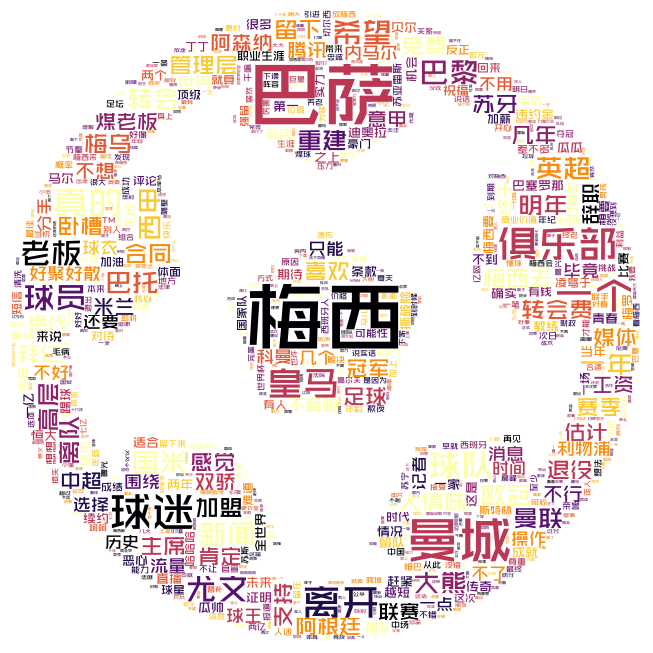

In [25]:
stopwords = open('baidu_stopwords.txt', encoding='utf-8').read().split('\n')

whole_comment = "".join(df1['评论内容'])

word_list = jieba.cut(whole_comment)

stylecloud.gen_stylecloud(text = ' '.join(word_list), max_words = 1000,
                          collocations = False,
                          font_path = 'C:\Windows\Fonts\simkai.ttf',
                          icon_name = 'fas fa-futbol',
                          size = 653,
                          palette = 'matplotlib.Inferno_9',
                          output_name = './comment.png',
                          custom_stopwords = stopwords)
Image(filename = './comment.png')

In [26]:
result = []
for i in df['评论内容']:
    result.append(re.split('[:：,，.。!！~·`\;；……、]',i))
    

def club_comment(df,result):
    clubs = pd.DataFrame(np.zeros(8 * len(df)).reshape(len(df),8),
                      columns = ['曼城','尤文','巴黎','国米','曼联','阿森纳','米兰','切尔西'])
    for i in range(len(result)):
        words = result[i]
        for word in words:
            if '曼城' in word:
                clubs.iloc[i + 1]['曼城'] = 1
            if '尤文' in word:
                clubs.iloc[i + 1]['尤文'] = 1
            if '巴黎' in word:
                clubs.iloc[i + 1]['巴黎'] = 1
            if '国米' in word:
                clubs.iloc[i + 1]['国米'] = 1
            if '曼联' in word:
                clubs.iloc[i + 1]['曼联'] = 1
            if '阿森纳' in word or '厂' in word:
                clubs.iloc[i + 1]['阿森纳'] = 1
            if '米兰' in word or '毛' in word:
                clubs.iloc[i + 1]['米兰'] = 1
            if '切尔西' in word or '车' in word:
                clubs.iloc[i + 1]['切尔西'] = 1

    final_result = pd.concat([df,clubs],axis = 1)
    return final_result

<>:3: DeprecationWarning: invalid escape sequence \;
<>:3: DeprecationWarning: invalid escape sequence \;
<>:3: DeprecationWarning: invalid escape sequence \;
<ipython-input-26-2a1cedb0cf4c>:3: DeprecationWarning: invalid escape sequence \;
  result.append(re.split('[:：,，.。!！~·`\;；……、]',i))


In [27]:
df3 = df1.iloc[:,1:].sum().reset_index().sort_values(0, ascending = True)

df3.columns = ['俱乐部','次数']
df3['占比'] = df3['次数'] / df3['次数'].sum()

c = (
    Bar(init_opts=opts.InitOpts(theme=ThemeType.WESTEROS))
    .add_xaxis(df3['俱乐部'].tolist())
    .add_yaxis("",df3['次数'].tolist()).reversal_axis() # X轴与y轴调换顺序
    .set_global_opts(title_opts=opts.TitleOpts(title="俱乐部被提及次数",subtitle="数据来源：直播吧",pos_top="2%",pos_left = 'center'),
                       xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=16)), # 更改横坐标字体大小
                       yaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(font_size=16)), # 更改纵坐标字体大小
                       )
    .set_series_opts(label_opts=opts.LabelOpts(font_size=16,position='right'))
    )
c.render_notebook()

/Users/crossin/anaconda3/envs/PY37/lib/python3.7/site-packages/pyecharts/charts/chart.py:14: PendingDeprecationWarning: pyecharts 所有图表类型将在 v1.9.0 版本开始强制使用 ChartItem 进行数据项配置 :)
  super().__init__(init_opts=init_opts)
